<h1>Berka bank</h1><hr>

In [67]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

<h3 style='color:orange'>Extract data</h3>

In [4]:
df_account = pd.read_csv('account.asc', sep=';')
df_card = pd.read_csv('card.asc', sep=';')
df_client = pd.read_csv('client.asc', sep=';')
df_disp = pd.read_csv('disp.asc', sep=';')
df_district = pd.read_csv('district.asc', sep=';')
df_loan= pd.read_csv('loan.asc', sep=';')
df_order= pd.read_csv('order.asc', sep=';')
df_trans = pd.read_csv('trans.asc', sep=';')

<h3 style='color:orange'>Exploratory data analysis</h3>

In [5]:
df_district

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [6]:
df_account_district_merge = df_account.merge(df_district, left_on = 'district_id', right_on='A1', how = 'left')

In [7]:
df_account_district_merge = df_account_district_merge.groupby('frequency').agg({'account_id':'nunique'}).reset_index()
df_account_district_merge['relative_accounts'] = df_account_district_merge['account_id']/df_account_district_merge['account_id'].sum()
df_account_district_merge = df_account_district_merge.rename({'account_id':'unique_accounts'},axis= 1)

In [8]:
df_account_district_merge.round(2)

,frequency,unique_accounts,relative_accounts
0,POPLATEK MESICNE,4167,0.93
1,POPLATEK PO OBRATU,93,0.02
2,POPLATEK TYDNE,240,0.05


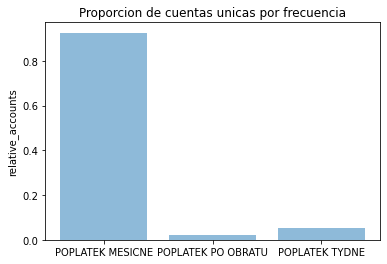

In [9]:
plt.bar(df_account_district_merge.frequency.tolist(), df_account_district_merge.relative_accounts.tolist(), align='center', alpha=0.5)
plt.ylabel('relative_accounts')
plt.title('Proporcion de cuentas unicas por frecuencia')
plt.show()

In [10]:
df_avg_accounts =  df_account.merge(df_district, left_on = 'district_id', right_on='A1', how = 'left').groupby('A3').agg({'account_id':'nunique','A11':'mean'}).reset_index().sort_values('account_id', ascending=False).rename({'account_id':'count_unique_accounts','A11':'avg_salary'},axis = 1)

In [11]:
df_avg_accounts

,A3,count_unique_accounts,avg_salary
4,north Moravia,793,9409.911728
6,south Moravia,778,8895.430591
1,central Bohemia,574,9408.621951
0,Prague,554,12541.000000
2,east Bohemia,544,8625.875000
3,north Bohemia,457,9310.026258
7,west Bohemia,430,9018.332558
5,south Bohemia,370,8817.321622


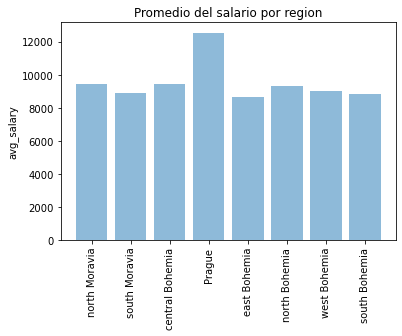

In [12]:
plt.bar(df_avg_accounts.A3.tolist(), df_avg_accounts.avg_salary.tolist(), align='center', alpha=0.5)
plt.ylabel('avg_salary')
plt.title('Promedio del salario por region')
plt.xticks(rotation=90)
plt.show()

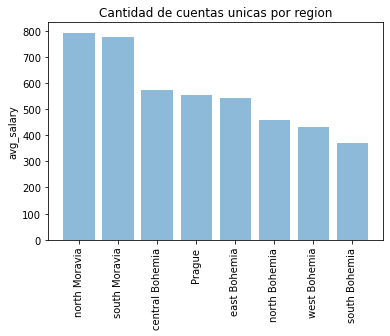

In [13]:
plt.bar(df_avg_accounts.A3.tolist(), df_avg_accounts.count_unique_accounts.tolist(), align='center', alpha=0.5)
plt.ylabel('avg_salary')
plt.title('Cantidad de cuentas unicas por region')
plt.xticks(rotation=90)
plt.show()

In [14]:
df_card_stats = df_card.groupby('type').agg({'card_id':'nunique'}).reset_index()

In [15]:
df_card_stats['relative_frequency'] = df_card_stats['card_id']/df_card_stats['card_id'].sum()

In [16]:
df_card_stats.round(2)

,type,card_id,relative_frequency
0,classic,659,0.74
1,gold,88,0.10
2,junior,145,0.16


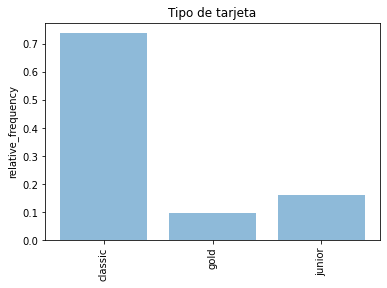

In [17]:
plt.bar(df_card_stats.type.tolist(), df_card_stats.relative_frequency.tolist(), align='center', alpha=0.5)
plt.ylabel('relative_frequency')
plt.title('Tipo de tarjeta')
plt.xticks(rotation=90)
plt.show()

<h3 style = 'color:orange'>Data wrangling</h3>

In [18]:
df_unique_trans = df_trans.groupby('account_id').agg({'trans_id':'nunique'}).reset_index().rename({'trans_id':'unique_trans'},axis=1)

In [19]:
df_unique_trans.head()

,account_id,unique_trans
0,1,239
1,2,478
2,3,117
3,4,186
4,5,84


In [20]:
df_account_sum = df_order.groupby('account_id').agg({'amount':'sum'}).reset_index().rename({'amount':'sum_amount'},axis = 1)

In [21]:
df_account_sum.head()

,account_id,sum_amount
0,1,2452.0
1,2,10638.7
2,3,5001.0
3,4,3363.0
4,5,2668.0


In [22]:
df_table_miner = df_card.drop('issued', axis = 1).merge(df_disp, on = 'disp_id', how = 'left', suffixes=('_card','_client')).merge(df_account.drop('date', axis = 1), on = 'account_id', how = 'left').merge(df_district[['A1','A3','A4','A11']], left_on = 'district_id', right_on='A1').merge(df_client[['client_id','birth_number']], on='client_id', how = 'left').merge(df_loan[['account_id','amount','duration', 'status']], on = 'account_id', how = 'inner').merge(df_account_sum, on = 'account_id', how = 'left').merge(df_unique_trans, on = 'account_id', how = 'left').drop(['disp_id','account_id','district_id','card_id','A1'], axis = 1)

In [23]:
df_table_miner.head()

,type_card,client_id,type_client,frequency,A3,A4,A11,birth_number,amount,duration,status,sum_amount,unique_trans
0,classic,9593,OWNER,POPLATEK MESICNE,north Moravia,323870,10673,685128,51696,24,A,2153.8,500
1,classic,7422,OWNER,POPLATEK MESICNE,north Moravia,323870,10673,581126,59760,24,A,10337.0,416
2,classic,3519,OWNER,POPLATEK MESICNE,north Moravia,323870,10673,491215,380160,60,C,6336.0,369
3,classic,2522,OWNER,POPLATEK MESICNE,north Moravia,323870,10673,370908,214596,36,C,19589.0,128
4,junior,8359,OWNER,POPLATEK MESICNE,north Moravia,323870,10673,791206,194880,48,C,8644.5,376


In [24]:
df_table_miner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type_card     170 non-null    object 
 1   client_id     170 non-null    int64  
 2   type_client   170 non-null    object 
 3   frequency     170 non-null    object 
 4   A3            170 non-null    object 
 5   A4            170 non-null    int64  
 6   A11           170 non-null    int64  
 7   birth_number  170 non-null    int64  
 8   amount        170 non-null    int64  
 9   duration      170 non-null    int64  
 10  status        170 non-null    object 
 11  sum_amount    170 non-null    float64
 12  unique_trans  170 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 18.6+ KB


In [25]:
df_table_miner.drop('client_id', axis=1).select_dtypes(include=np.number).describe()

,A4,A11,birth_number,amount,duration,sum_amount,unique_trans
count,1.700000e+02,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,2.756797e+05,9584.011765,588492.882353,159076.517647,35.858824,9040.375882,277.217647
std,3.591330e+05,1314.206085,133564.972366,114895.345236,17.317879,5140.969004,136.027385
min,4.282100e+04,8173.000000,351003.000000,12540.000000,12.000000,312.000000,49.000000
25%,8.888400e+04,8561.000000,470172.000000,74061.000000,24.000000,5241.525000,169.000000
50%,1.266005e+05,9084.500000,580969.500000,120120.000000,36.000000,7957.850000,254.500000
75%,2.288480e+05,10045.000000,705807.750000,222969.000000,48.000000,12498.750000,374.250000
max,1.204953e+06,12541.000000,806113.000000,495180.000000,60.000000,21725.300000,643.000000


In [26]:
df_table_miner.groupby(['type_client']).agg({'client_id':'nunique'})

,client_id
type_client,
OWNER,170


<p>Todos los clientes dentro del estudio de clasificacion de tarjetas son propietarios de su respectiva cuenta</p>

In [27]:
df_frequency_table = df_table_miner.groupby(['frequency']).agg({'client_id':'nunique'}).reset_index()

In [28]:
df_frequency_table

,frequency,client_id
0,POPLATEK MESICNE,145
1,POPLATEK PO OBRATU,6
2,POPLATEK TYDNE,19


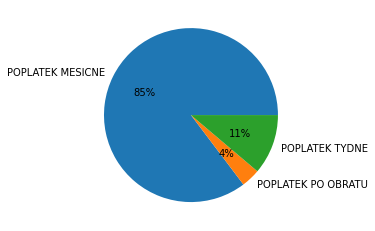

In [29]:
plt.pie(df_frequency_table.client_id.values.tolist(), labels = df_frequency_table.frequency.values.tolist(), autopct='%.0f%%')
plt.show()

<p>La mayoria de los clientes seleccionados tienen una frecuencia correspondiente a POPLATEK MESICNE</p>

In [30]:
df_type_card = df_table_miner.groupby(['type_card']).agg({'client_id':'nunique'}).reset_index()

In [31]:
df_type_card.head()

,type_card,client_id
0,classic,133
1,gold,16
2,junior,21


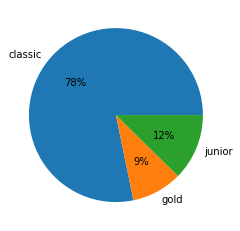

In [32]:
plt.pie(df_type_card.client_id.values.tolist(), labels = df_type_card.type_card.values.tolist(), autopct='%.0f%%')
plt.show()

<p>Se puede ver que la proporcion de estudio es similar a la de la poblacion, por lo que se tiene aparente representatividad</p>

In [33]:
df_zone = df_table_miner.groupby(['A3']).agg({'client_id':'nunique'}).reset_index()

In [34]:
df_zone

,A3,client_id
0,Prague,21
1,central Bohemia,23
2,east Bohemia,17
3,north Bohemia,21
4,north Moravia,34
5,south Bohemia,17
6,south Moravia,23
7,west Bohemia,14


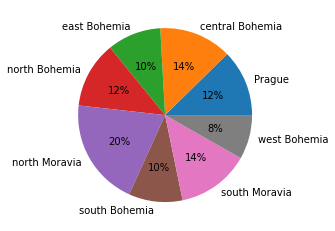

In [35]:
plt.pie(df_zone.client_id.values.tolist(), labels = df_zone.A3.values.tolist(), autopct='%.0f%%')
plt.show()

<p>Se puede ver que la distribucion entre regiones no presenta un patron representativo</p>

In [36]:
df_status = df_table_miner.groupby(['status']).agg({'client_id':'nunique'}).reset_index()

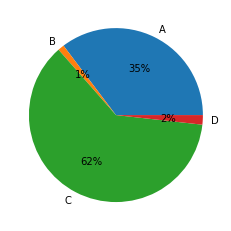

In [37]:
plt.pie(df_status.client_id.values.tolist(), labels = df_status.status.values.tolist(), autopct='%.0f%%')
plt.show()

<p>Se puede ver que la mayor estatus presente es el C</p>

<AxesSubplot:xlabel='sum_amount', ylabel='Count'>

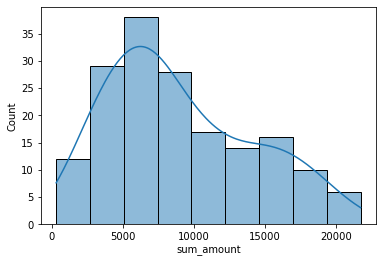

In [38]:
sns.histplot(data=df_table_miner, x="sum_amount", kde = True)

<p>Se puede ver que la distribucion del monto se encuentra sesgado a la derecha</p>

<AxesSubplot:xlabel='sum_amount'>

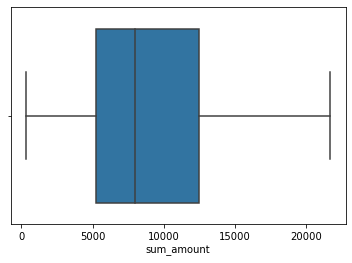

In [39]:
sns.boxplot(x=df_table_miner["sum_amount"])

<p>Empleando un boxplot, se puede ver que no existen outliers para esta variable</p>

<AxesSubplot:xlabel='A11', ylabel='Count'>

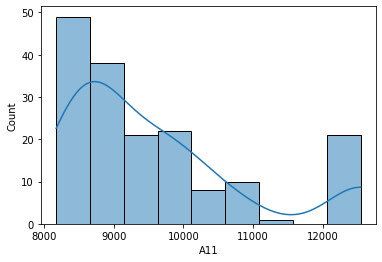

In [40]:
sns.histplot(data=df_table_miner, x="A11", kde = True)

<p>Para la variable de salario medio por zona, se puede ver que no se tiene una distribucion normal, y esta sesgado a la derecha</p>

<AxesSubplot:xlabel='A11'>

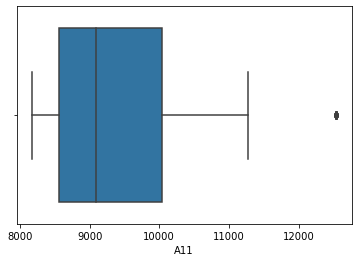

In [41]:
sns.boxplot(x=df_table_miner["A11"])

<p>Se puede ver que la variable de salario medio presenta un outlier</p>

<AxesSubplot:xlabel='unique_trans', ylabel='Count'>

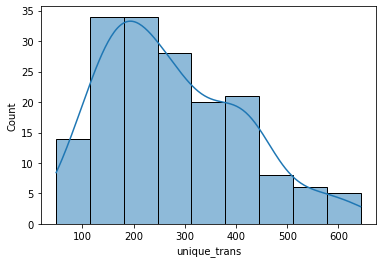

In [42]:
sns.histplot(data=df_table_miner, x="unique_trans", kde = True)

<p>Para la variable de transacciones unicas realizadas se puede ver que puede presentar una distribucion normal algo sesgada</p>

<AxesSubplot:xlabel='unique_trans'>

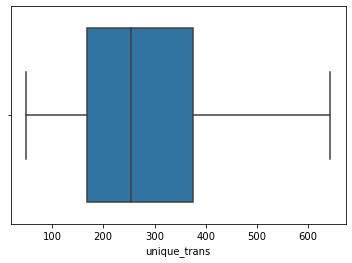

In [43]:
sns.boxplot(x=df_table_miner["unique_trans"])

<AxesSubplot:xlabel='A4'>

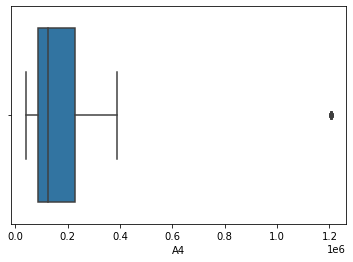

In [68]:
sns.boxplot(x=df_table_miner["A4"])

<AxesSubplot:xlabel='duration'>

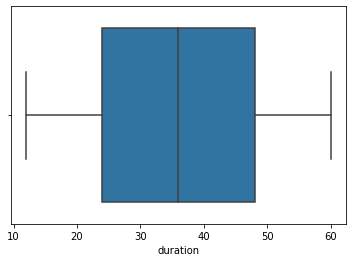

In [69]:
sns.boxplot(x=df_table_miner["duration"])

<AxesSubplot:xlabel='duration', ylabel='Count'>

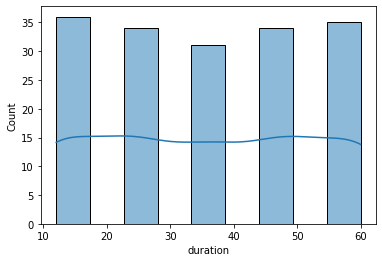

In [70]:
sns.histplot(data=df_table_miner, x="duration", kde = True)

<p>La variable de transacciones no presenta outliers</p>

<h3 style = 'color:orange'>Clear outliers</h3>

In [75]:
df_table_miner['Z_A11'] = np.abs(stats.zscore(df_table_miner["A11"]))
df_table_miner['Z_A4'] = np.abs(stats.zscore(df_table_miner["A4"]))

In [77]:
df_table_miner.sort_values('Z_A4').tail(10)

,type_card,client_id,type_client,frequency,A3,A4,A11,birth_number,amount,duration,status,sum_amount,unique_trans,Z_A11,Z_A4
28,junior,11409,OWNER,POPLATEK MESICNE,Prague,1204953,12541,805502,39576,12,A,16808.3,643,2.256666,2.595191
37,junior,7959,OWNER,POPLATEK MESICNE,Prague,1204953,12541,785629,390660,60,C,17265.7,224,2.256666,2.595191
29,junior,10282,OWNER,POPLATEK TYDNE,Prague,1204953,12541,790619,247728,48,C,11804.2,339,2.256666,2.595191
30,junior,2592,OWNER,POPLATEK MESICNE,Prague,1204953,12541,805831,71460,36,C,9249.0,228,2.256666,2.595191
31,classic,8030,OWNER,POPLATEK MESICNE,Prague,1204953,12541,670719,100260,60,C,1671.0,186,2.256666,2.595191
32,classic,2267,OWNER,POPLATEK MESICNE,Prague,1204953,12541,665410,37944,36,C,1054.0,169,2.256666,2.595191
33,classic,9933,OWNER,POPLATEK MESICNE,Prague,1204953,12541,411015,140400,36,A,3900.5,442,2.256666,2.595191
34,classic,13694,OWNER,POPLATEK TYDNE,Prague,1204953,12541,765120,44940,12,A,3744.7,152,2.256666,2.595191
36,classic,13134,OWNER,POPLATEK MESICNE,Prague,1204953,12541,626103,197808,24,C,14911.8,116,2.256666,2.595191
42,classic,5563,OWNER,POPLATEK MESICNE,Prague,1204953,12541,760101,66696,24,C,15038.7,124,2.256666,2.595191


In [78]:
df_table_miner.isna().sum()

type_card       0
client_id       0
type_client     0
frequency       0
A3              0
A4              0
A11             0
birth_number    0
amount          0
duration        0
status          0
sum_amount      0
unique_trans    0
Z_A11           0
Z_A4            0
dtype: int64

<p>Se puede ver que ningun valor supera las 3 desviaciones estandares, por lo que la limpieza por normalizacion no remueve ningun punto</p>

<h3 style = 'color:orange'>One hot encoder</h3>

In [46]:
df_all_variables = pd.get_dummies(df_table_miner, columns=['frequency','A3','type_client','status'])

<p>Finalmente es tiene la tabla desnormalizada para un posterior analisis de minado, donde la variable target es el tipo de tarjeta que en este caso esta representado por la variable type_card</p>

In [47]:
df_all_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   type_card                     170 non-null    object 
 1   client_id                     170 non-null    int64  
 2   A4                            170 non-null    int64  
 3   A11                           170 non-null    int64  
 4   birth_number                  170 non-null    int64  
 5   amount                        170 non-null    int64  
 6   duration                      170 non-null    int64  
 7   sum_amount                    170 non-null    float64
 8   unique_trans                  170 non-null    int64  
 9   Z_A11                         170 non-null    float64
 10  frequency_POPLATEK MESICNE    170 non-null    uint8  
 11  frequency_POPLATEK PO OBRATU  170 non-null    uint8  
 12  frequency_POPLATEK TYDNE      170 non-null    uint8  
 13  A3_Pr

In [80]:
df_all_variables.columns

Index(['type_card', 'client_id', 'A4', 'A11', 'birth_number', 'amount',
       'duration', 'sum_amount', 'unique_trans', 'Z_A11',
       'frequency_POPLATEK MESICNE', 'frequency_POPLATEK PO OBRATU',
       'frequency_POPLATEK TYDNE', 'A3_Prague', 'A3_central Bohemia',
       'A3_east Bohemia', 'A3_north Bohemia', 'A3_north Moravia',
       'A3_south Bohemia', 'A3_south Moravia', 'A3_west Bohemia',
       'type_client_OWNER', 'status_A', 'status_B', 'status_C', 'status_D'],
      dtype='object')

In [81]:
df_all_variables.drop(['client_id','Z_A11'], axis = 1).head(1).T

,0
type_card,classic
A4,323870
A11,10673
birth_number,685128
amount,51696
duration,24
sum_amount,2153.8
unique_trans,500
frequency_POPLATEK MESICNE,1
frequency_POPLATEK PO OBRATU,0


<p>Se estudia la correlacion entre las variables por medio de un mapa de calor para ver si es que no se presentan casos de multicolinealidad</p>

<AxesSubplot:>

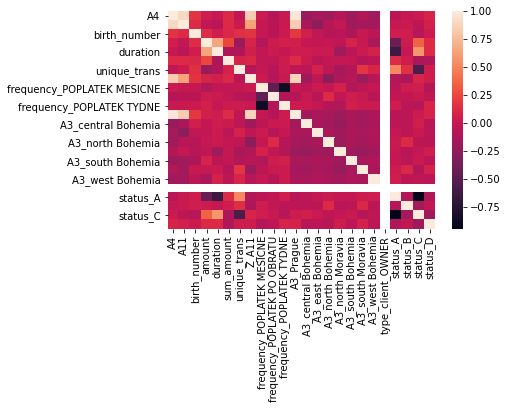

In [48]:
sns.heatmap(df_all_variables.drop('client_id', axis = 1).select_dtypes(include = np.number).corr()) 

In [65]:
skew_list, kurtosis_list = [],[]
var_list = ['A4','A11','sum_amount','unique_trans','duration']
for var_study in var_list:
    skew_var,kurtosis_var = skew(df_table_miner[var_study]),kurtosis(df_table_miner[var_study])
    skew_list.append(skew_var)
    kurtosis_list.append(kurtosis_var)
df_all_descritive_stats = pd.DataFrame({'VARIABLE_STUDY':var_list, 'SKEW':skew_list,'KURTOSIS':kurtosis_list})
    

In [66]:
df_all_descritive_stats

,VARIABLE_STUDY,SKEW,KURTOSIS
0,A4,2.075869,2.648609
1,A11,1.226921,0.470618
2,sum_amount,0.543308,-0.651425
3,unique_trans,0.616315,-0.287758
4,duration,0.008733,-1.347971
